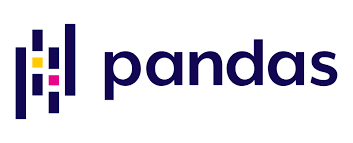

## [49] Seleksi kolom dengan f-string

### [49.1] Import Module

In [1]:
import pandas as pd
print(pd.__version__)

1.0.5


### [49.2] Persiapan data frame

In [3]:
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### [49.3] Seleksi kolom dengan f-string
- Penggunaan to_frame() bertujuan untuk menampilkan data frame ke dalam tampilan yang lebih rapi
- Penggunaan head() bertujuan untuk menampilkan hanya 5 kolom pertama dari data pada data frame
- Pada dasarnya hasil yang ditampilkan oleh seleksi menggunakan f-string sama, yang membedakan hanya string "sepal" ditampung terlebih dahulu ke dalam variabel part
- Apabila kolom yang diseleksi pada data frame > 1 maka tidak diperlukan pemanggilan fungsi to_frame()

In [4]:
df['SepalWidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [6]:
part = 'Sepal'
df[f'{part}WidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [8]:
df[['PetalWidthCm','PetalLengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


In [9]:
part = 'Petal'

df[[f'{part}WidthCm',f'{part}LengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


## [50] Membuat Kolom Baru dengan looping dan f-string

### [50.1] Import Module

In [10]:
import pandas as pd 
print(pd.__version__)

1.0.5


### [50.2] Persiapan Data Frame

In [18]:
d = {'penjual':['bejo','tejo','wati','bejo','cecep','tejo','wati','bejo'],
    'barang':['monitor','monitor','keyboard','mouse','keyboard','monitor','laptop','monitor']}
df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,wati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,wati,laptop
7,bejo,monitor


### [50.3] Membuat Kolom baru dengan looping dan f-string
- Dengan menggunakan looping dan f-string dapat dibentuk 2 kolom baru dengan nama count_tiap_penjual dan count_tiap_barang

In [19]:
cols = ['penjual','barang']

for col in cols :
    df[f'count_tiap_{col}'] = df.groupby(col).cumcount()+1
df

,penjual,barang,count_tiap_penjual,count_tiap_barang
0,bejo,monitor,1,1
1,tejo,monitor,1,2
2,wati,keyboard,1,1
3,bejo,mouse,2,1
4,cecep,keyboard,1,2
5,tejo,monitor,2,3
6,wati,laptop,2,1
7,bejo,monitor,3,4


## [51] Seleksi baris dengan between()

### [51.1] Import Module

In [20]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [51.2] Persiapan data frame
- data frame yang dibentuk terdiri dari 10 baris dan 5 kolom yang diisi dengan angka random yang berkisar antara 1-10

In [28]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10,size=(n_rows,n_cols)),columns=cols)
df

,A,B,C,D,E
0,7,4,4,8,2
1,8,8,5,2,3
2,5,9,6,6,5
3,6,3,1,5,7
4,3,1,6,5,6
5,4,4,3,6,7
6,7,9,9,8,2
7,2,1,7,2,2
8,4,1,7,6,7
9,2,8,6,1,8


### [51.3] Seleksi Baris dengan Between()
- Secara default nilai parameter inclusive adalah true yang mengindikasikan nilai 2 dan 5 juga diikutsertakan dalam proses penyeleksian
- Sedangkan jika parameter inclusive bernilai false maka nilai 2 dan 5 tidak diikutsertakan dalam proses penyeleksian

In [29]:
df[df['A'].between(2,5)]

,A,B,C,D,E
2,5,9,6,6,5
4,3,1,6,5,6
5,4,4,3,6,7
7,2,1,7,2,2
8,4,1,7,6,7
9,2,8,6,1,8


In [30]:
df[df['A'].between(2,5,inclusive=False)]

,A,B,C,D,E
4,3,1,6,5,6
5,4,4,3,6,7
8,4,1,7,6,7


## [52] Transformasi Kolom Menjadi Baris dalam Data Frame

### [52.1] Import Module

In [31]:
import pandas as pd
print(pd.__version__)

1.0.5


### [52.2] Persiapan Data Frame

In [32]:
d = {
    'kode_area':[123,456,789,321],
    'pabrik':[4,2,5,0],
    'gudang':[2,4,7,3],
    'toko':[64,32,15,24]
}

df = pd.DataFrame(d)
df

,kode_area,pabrik,gudang,toko
0,123,4,2,64
1,456,2,4,32
2,789,5,7,15
3,321,0,3,24


### [52.3] Transformasi Kolom Menjadi Baris
- df.melt() adalah fungsi yang digunakan untuk mentransformasikan kolom menjadi baris
- penggunaan method .melt() setidaknya membutuhkan 3 parameter
- parameter pertama adalah id_vars yang sering kali berasosiasi dengan primary key
- parameter kedua adalah var_name yang berasosiasi dengan nama kolom baru hasil transformasi kolom menjadi baris
- parameter ketiga adalah value name yang akan menampung jumlah dari hasil transformasi kolom menjadi baris

In [33]:
df = df.melt(id_vars = 'kode_area',
            var_name = 'jenis_bangunan',
            value_name = 'jumlah')
df

,kode_area,jenis_bangunan,jumlah
0,123,pabrik,4
1,456,pabrik,2
2,789,pabrik,5
3,321,pabrik,0
4,123,gudang,2
5,456,gudang,4
6,789,gudang,7
7,321,gudang,3
8,123,toko,64
9,456,toko,32
